# Unstructured Data Analysis Project

**Unstructured data analysis** refers to the process of extracting insights and meaningful information from unstructured data, such as text, images, and videos. Unlike structured data, which is organized in a specific format and can be easily analyzed using traditional statistical and analytical methods, unstructured data is typically not organized in a specific way and requires specialized tools and techniques to extract insights.

There are several techniques and tools used in unstructured data analysis, including natural language processing (NLP), machine learning algorithms, and data visualization. Some common applications of unstructured data analysis include sentiment analysis of customer reviews, topic modeling of social media posts, and image recognition for medical imaging.

NLP is one of the most widely used techniques in unstructured data analysis, which involves processing and analyzing human language data. NLP techniques can be used to extract and classify key topics, identify sentiment and emotion, and perform text summarization.

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import pyplot

import warnings
%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:

import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize, TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn .ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer


from sklearn.pipeline import  Pipeline


from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

from collections import Counter
from wordcloud import WordCloud





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## About Data

### Context of the data
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of `5,574 messages`, tagged acording being `ham (legitimate)` or `spam`.

### Content of the data
The files contain one message per line. Each line is composed by two columns: `v1` contains the label (ham or spam) and `v2` contains the raw text.

This corpus has been collected from free or free for research sources at the Internet:

* A collection of `425 SMS spam messages` was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link].
*  A subset of `3,375 SMS` randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link].
*  A list of `450 SMS` ham messages collected from Caroline Tag's PhD Thesis available at [Web Link].
*  Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

##  Importing Data

In [3]:
data = pd.read_csv('spam.csv',  encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Checking Data dimension

In [4]:
data.shape

(5572, 5)

## Last columns seem to be unnecessary, check if there are values in there

In [5]:
sum = data.isnull().sum()
percentage  = round((sum/data.isnull().count())*100,2)
Missing = pd.DataFrame([sum, percentage],
                      index=["Missing Values", "Missing Values(%)"])
Missing

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
Missing Values,0.0,0.0,5522.0,5560.00,5566.00
Missing Values(%),0.0,0.0,99.1,99.78,99.89


## Report on Missing Values
* Cloumn `v1` and `v2` have no missing values while the last three have more than `99%` missing values, therefore it's appropriate to remove them.
* Rename columns `v1` and `v2`.

### Dropping The last 3 columns

In [6]:
data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)

In [7]:
data.columns = ["label", "text"]
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Checking Count of labels categories

In [8]:
colors = ["#ff9999", "#66b3ff"]

In [9]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<AxesSubplot:ylabel='label'>

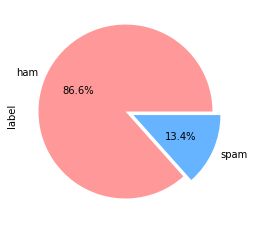

In [10]:
data['label'].value_counts().plot(kind = "pie", colors = colors, explode = (0.1,0), autopct ="%1.1f%%")

13.4% of dataset are spam messages, other 86.6% are not

Most popular "ham" text: 'Sorry, I'll call later', recurse 30 times.
Most popular "spam" text= 'Please call our customer service representative ...', recurse 4 times

### WordCloud
* A wordcloud is a visual representation of a collection of words where the size of each word represents its frequency or importance within the collection.
* Word clouds are often used to quickly convey the most common or prominent words in a text or dataset, and they can be useful for analyzing and summarizing large amounts of textual data.

In [11]:

stop_words = set(stopwords.words('english'))
spam_text =data.loc[data['label']== 'spam']
ham_text = data.loc[data['label'] == 'ham']


In [12]:
#counts the number of times a word appears in a text
count_ham = Counter(" ".join(data[data['label']=='ham']['text']).split()).most_common(100)
common_Ham = pd.DataFrame.from_dict(count_ham)[0]
common_ham = common_Ham.str.cat(sep = ' ')

count_spam = Counter(" ".join(data[data['label'] == 'spam']['text']).split()).most_common(100)
common_Spam = pd.DataFrame.from_dict(count_spam)[0]
common_spam = common_Spam.str.cat(sep=' ')


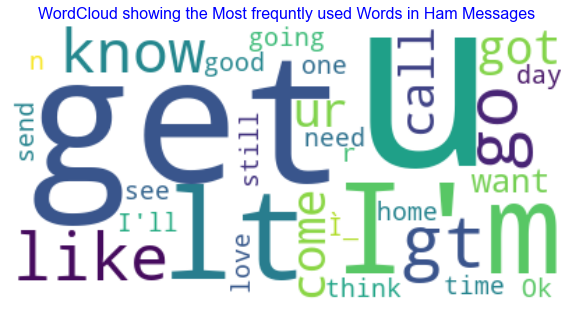

In [53]:
wordcloud_ham = WordCloud(stopwords = stop_words, background_color='white')
wordcloud_ham.generate(common_ham)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title("WordCloud showing the Most frequntly used Words in Ham Messages", fontsize = 16, color = "blue")
plt.axis('off')
plt.show()

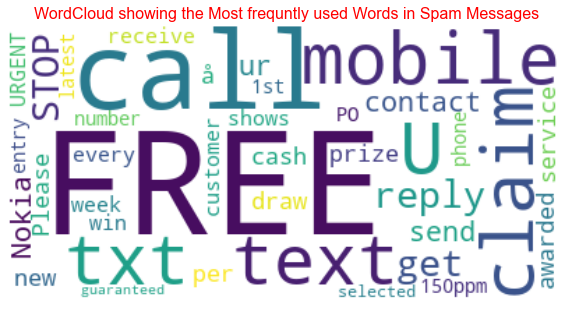

In [52]:
wordcloud_spam = WordCloud(stopwords=stop_words, background_color='white')
wordcloud_spam.generate(common_spam)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title("WordCloud showing the Most frequntly used Words in Spam Messages", fontsize = 16, color = 'red')
plt.axis('off')
plt.show()

## Generating Frequency

In [15]:
data.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

* Add variable length
* Change spam to dummy -> spam = 1, ham = 0

## Generating Length of the text

In [16]:
data['length'] = data['text'].apply(len)
data.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Creating Dummy variable for the label

In [17]:
data = pd.get_dummies(data, columns = ['label'], prefix = "Dummy", drop_first=True)
data.head()

,text,length,Dummy_spam
0,"Go until jurong point, crazy.. Available only ...",111,0
1,Ok lar... Joking wif u oni...,29,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,U dun say so early hor... U c already then say...,49,0
4,"Nah I don't think he goes to usf, he lives aro...",61,0


## Remove Stopwords

In [18]:
stop = stopwords.words('english')
data['text'].apply(lambda x: [item for item in x if item not in stop])
data.head()

,text,length,Dummy_spam
0,"Go until jurong point, crazy.. Available only ...",111,0
1,Ok lar... Joking wif u oni...,29,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,U dun say so early hor... U c already then say...,49,0
4,"Nah I don't think he goes to usf, he lives aro...",61,0


In [19]:
all_sent = []
for text in data.text:
    all_sent.append(text.lower())
    
common_sent = nltk.FreqDist(all_sent).most_common(10)
display(common_sent)

[("sorry, i'll call later", 30),
 ('i cant pick the phone right now. pls send a message', 12),
 ('ok...', 10),
 ('please call our customer service representative on freephone 0808 145 4742 between 9am-11pm as you have won a guaranteed å£1000 cash or å£5000 prize!',
  4),
 ('wen ur lovable bcums angry wid u, dnt take it seriously.. coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... have nice day da.',
  4),
 ('your opinion about me? 1. over 2. jada 3. kusruthi 4. lovable 5. silent 6. spl character 7. not matured 8. stylish 9. simple pls reply..',
  4),
 ('7 wonders in my world 7th you 6th ur style 5th ur smile 4th ur personality 3rd ur nature 2nd ur sms and 1st \\ur lovely friendship\\"... good morning dear"',
  4),
 ('say this slowly.? god,i love you &amp; i need you,clean my heart with your blood.send this to ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...',
  4),
 ('ok', 4),
 ('ok.', 4)]

## Creating Feature

In [20]:
X = data['length'].values[:, None]
X

array([[111],
       [ 29],
       [155],
       ...,
       [ 57],
       [125],
       [ 26]], dtype=int64)

## Creating target

In [21]:
y = data['Dummy_spam'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

## Splitting data into train and test set

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123 ,stratify=y)

## Checking Distribution of labels

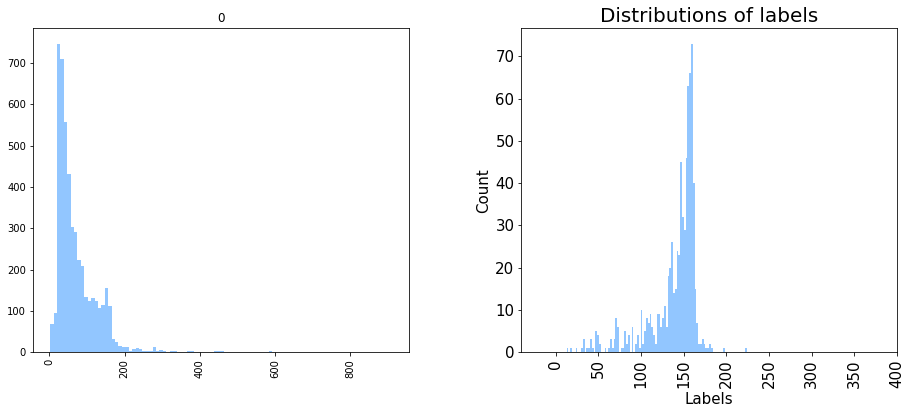

In [23]:
plt.style.use('seaborn-pastel')
data.hist(column='length', by = 'Dummy_spam', figsize=(15,6), bins=100, label = ('Ham', 'Spam'))
plt.title('Distributions of labels', fontsize = 20, color = 'black')
plt.ylabel('Count',color="black", fontsize = 15)
plt.xticks(color= "black", fontsize = 15)
plt.yticks(color= "black", fontsize = 15)
plt.xlabel("Labels", color="black", fontsize = 15)
plt.xlim(-40,400)
plt.ioff()
plt.show()

## List of Machine Learning Models
Below is a brief description of each model:

* Logistic Regression (LR): A linear model used for binary classification problems.
* Support Vector Machine (SVM): A model that tries to find a hyperplane that separates different classes.
* Random Forest (RF): An ensemble learning method that creates multiple decision trees and combines their outputs to make a final prediction.
* Multi-Layer Perceptron (NN): A neural network with multiple hidden layers that can learn complex non-linear relationships in data.
* K-Nearest Neighbors (KNN): A simple and effective classification algorithm that assigns the class of the majority of its k-nearest neighbors in the feature space.
* Decision Tree Classifier (DTC): A model that splits the data into smaller subsets based on the most important features at each node and then assigns the class label based on the majority class of the data points within each subset.
* Multinomial Naive Bayes (MNB): A probabilistic model that uses Bayes theorem to predict the class of a given input.
* AdaBoost Classifier (ABC): An ensemble learning method that creates a set of weak classifiers and combines them to form a stronger classifier by weighting the instances that were misclassified by the previous classifiers.

This list of models is used to train and compare the performance of different classifiers in this project.

In [24]:
models = []
models.append(['LR', LogisticRegression(solver="lbfgs")])
models.append(['SVM', svm.SVC(gamma='auto')])
models.append(['RF', RandomForestClassifier(n_estimators=1000, max_depth=10)])
models.append(['NN', MLPClassifier(solver='lbfgs', alpha=1e-15, hidden_layer_sizes= (150,10))])
models.append(['KNN', KNeighborsClassifier()])
models.append(['DTC', DecisionTreeClassifier()])
models.append(['MNB', MultinomialNB(alpha=0.2)])
models.append(['ABC', AdaBoostClassifier(n_estimators=100)])


In [25]:
results = []
for name, model in models:
    evalution_model = model
    evalution_model.fit(X_train, y_train)
    pred = evalution_model.predict(X_test)
    acc = round(accuracy_score(y_test, pred)*100,2)
    precision = precision_score(y_test, pred, average=None)*100
    recall = recall_score(y_test, pred, average=None)*100
    error_rate = round((100 - acc),2)
    cm = pd.DataFrame(metrics.confusion_matrix(y_test, pred), index=['ham', 'spam'], columns=['ham', 'spam'])
    print('Model tested: {}'.format(name))
    print('Confusion Matrix')
    print(cm)
    print('Accuracy = {}%'.format(acc))
    print('Error rate = {}%'.format(error_rate))
    print('Recall rate = {}%'.format(recall))
    print('Precision rate = {}%'.format(precision))
    print(metrics.classification_report(y_test, pred))
    print()
    results.append([name, precision])
    
    
    

Model tested: LR
Confusion Matrix
      ham  spam
ham   938    28
spam  149     0
Accuracy = 84.13%
Error rate = 15.87%
Recall rate = [97.10144928  0.        ]%
Precision rate = [86.2925483  0.       ]%
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       966
           1       0.00      0.00      0.00       149

    accuracy                           0.84      1115
   macro avg       0.43      0.49      0.46      1115
weighted avg       0.75      0.84      0.79      1115


Model tested: SVM
Confusion Matrix
      ham  spam
ham   909    57
spam   72    77
Accuracy = 88.43%
Error rate = 11.57%
Recall rate = [94.09937888 51.67785235]%
Precision rate = [92.66055046 57.46268657]%
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       966
           1       0.57      0.52      0.54       149

    accuracy                           0.88      1115
   macro avg       0.75      0.73      0.74  

In [26]:
spam_text = data.loc[data['Dummy_spam'] == 1]['text']
ham_text = data.loc[data['Dummy_spam'] == 0]['text']

Countvectorizer:
* TF-IDF Vectorizer:
* stopwords get removed
* Words NOT Stemmed

In [27]:
X = data['text']
y = data['Dummy_spam']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [29]:
results2 = []
for name, model in models:
    text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')), (name, model)])
    text_clf.fit(X_train, y_train)
    pred = text_clf.predict(X_test)
    acc = round(accuracy_score(y_test, pred)*100, 2)
    precision = precision_score(y_test, pred, average=None)*100
    recall = recall_score(y_test, pred, average=None)*100
    error_rate = round(100- acc, 2)
    cm = pd.DataFrame(metrics.confusion_matrix(y_test, pred), index = ['ham', 'spam'], columns = ['ham', 'spam'])
    print('Model tested: {}'.format(name))
    print('Confusion Matrix')
    print(cm)
    print('Accuracy = {}%'.format(acc))
    print('Error rate = {}%'.format(error_rate))
    print('Recall rate = {}%'.format(recall))
    print('Precision rate = {}%'.format(precision))
    print(metrics.classification_report(y_test, pred))
    print()
    results2.append([name, precision])
    

Model tested: LR
Confusion Matrix
      ham  spam
ham   965     1
spam   37   112
Accuracy = 96.59%
Error rate = 3.41%
Recall rate = [99.89648033 75.16778523]%
Precision rate = [96.30738523 99.11504425]%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.75      0.85       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Model tested: SVM
Confusion Matrix
      ham  spam
ham   966     0
spam  149     0
Accuracy = 86.64%
Error rate = 13.36%
Recall rate = [100.   0.]%
Precision rate = [86.6367713  0.       ]%
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       966
           1       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weight

In [30]:
results

[['LR', array([86.2925483,  0.       ])],
 ['SVM', array([92.66055046, 57.46268657])],
 ['RF', array([92.73285568, 56.52173913])],
 ['NN', array([86.31772268,  0.        ])],
 ['KNN', array([90.234375  , 53.84615385])],
 ['DTC', array([92.51769464, 59.52380952])],
 ['MNB', array([86.6367713,  0.       ])],
 ['ABC', array([93.7694704 , 58.55263158])]]

## Creating DataFrame for results1

In [31]:
df1 = pd.DataFrame(results, columns= ['Model', "Accuracy Length"])
# df1[['Accuracy1', 'Accuracy2']] = df1['Accuracy Length'].apply(pd.Series)
df1['Accuracy Length'] = df1['Accuracy Length'].apply(lambda x: x[0])
df1

,Model,Accuracy Length
0,LR,86.292548
1,SVM,92.660550
2,RF,92.732856
3,NN,86.317723
4,KNN,90.234375
5,DTC,92.517695
6,MNB,86.636771
7,ABC,93.769470


## Creating DataFrame for results2

In [32]:
df2 = pd.DataFrame(results2, columns=['Model', 'Accuracy Words of bags'])
df2['Accuracy Words of bags'] = df2['Accuracy Words of bags'].apply(lambda x: x[0])
df2

,Model,Accuracy Words of bags
0,LR,96.307385
1,SVM,86.636771
2,RF,89.693593
3,NN,99.376299
4,KNN,90.364827
5,DTC,98.240166
6,MNB,98.975410
7,ABC,97.861507


## Merging two DataFrames for the two results

In [33]:
df3 = df1.merge(df2, on = "Model")
df3

,Model,Accuracy Length,Accuracy Words of bags
0,LR,86.292548,96.307385
1,SVM,92.660550,86.636771
2,RF,92.732856,89.693593
3,NN,86.317723,99.376299
4,KNN,90.234375,90.364827
5,DTC,92.517695,98.240166
6,MNB,86.636771,98.975410
7,ABC,93.769470,97.861507


## Meting Accuracy data into a long format

In [34]:
df_melt = pd.melt(df3, id_vars = ['Model'], var_name="Accuracy", value_name='value')
df_melt

,Model,Accuracy,value
0,LR,Accuracy Length,86.292548
1,SVM,Accuracy Length,92.660550
2,RF,Accuracy Length,92.732856
3,NN,Accuracy Length,86.317723
4,KNN,Accuracy Length,90.234375
5,DTC,Accuracy Length,92.517695
6,MNB,Accuracy Length,86.636771
7,ABC,Accuracy Length,93.769470
8,LR,Accuracy Words of bags,96.307385
9,SVM,Accuracy Words of bags,86.636771


## Bar graph Showing Accuracies of different models

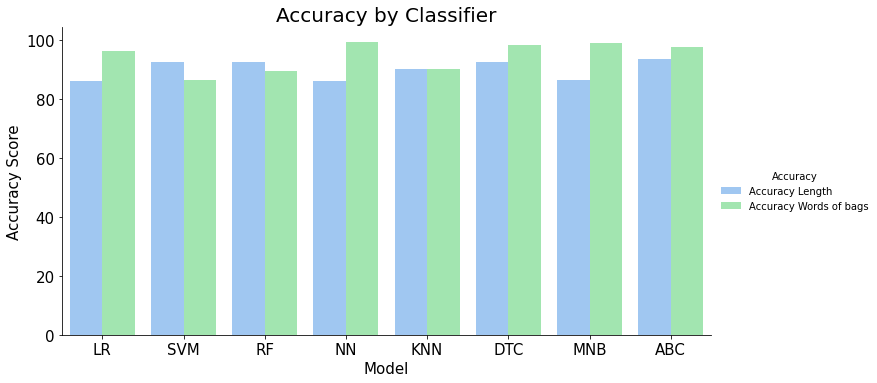

In [35]:

sns.catplot(x = "Model", y = "value", hue ='Accuracy', data=df_melt, kind='bar', height=5, aspect=2)
plt.title('Accuracy by Classifier', fontsize = 20, color = 'black')
plt.ylabel('Accuracy Score',color="black", fontsize = 15)
plt.xticks(color= "black", fontsize = 15)
plt.yticks(color= "black", fontsize = 15)
plt.xlabel("Model", color="black", fontsize = 15)

plt.show()

Countvectorizer:
* TF-IDF Vectorizer:
* stopwords get removed
* Words Stemmed

## Stemming
Stemming is a technique used to reduce an inflected word down to its word stem. For example, the words “programming,” “programmer,” and “programs” can all be reduced down to the common word stem “program.” In other words, “program” can be used as a synonym for the prior three inflection words. 

Performing this text-processing technique is often useful for dealing with sparsity and/or standardizing vocabulary. Not only does it help with reducing redundancy, as most of the time the word stem and their inflected words have the same meaning, it also allows NLP models to learn links between inflected words and their word stem, which helps the model understand their usage in similar contexts. 

Stemming algorithms function by taking a list of frequent prefixes and suffixes found in inflected words and chopping off the end or beginning of the word. This can occasionally result in word stems that are not real words; thus, we can affirm this approach certainly has its pros, but it’s not without its limitations. 

In [36]:
def get_final_text(stemmed_text):
    final_text = " ".join([word for word in stemmed_text])
    return final_text

In [37]:
stemmer = PorterStemmer()
data = pd.read_csv('spam.csv', encoding='latin-1')
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)
data.columns= ['label', 'text']
data.text = data['text'].str.split()
data['stemmed_text'] = data['text'].apply(lambda x: [stemmer.stem(y) for y in x])
data['final_text'] = data['stemmed_text'].apply(lambda row: get_final_text(row))
data.head()


,label,text,stemmed_text,final_text
0,ham,"[Go, until, jurong, point,, crazy.., Available...","[go, until, jurong, point,, crazy.., avail, on...","go until jurong point, crazy.. avail onli in b..."
1,ham,"[Ok, lar..., Joking, wif, u, oni...]","[ok, lar..., joke, wif, u, oni...]",ok lar... joke wif u oni...
2,spam,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entri, in, 2, a, wkli, comp, to, win, f...",free entri in 2 a wkli comp to win fa cup fina...
3,ham,"[U, dun, say, so, early, hor..., U, c, already...","[u, dun, say, so, earli, hor..., u, c, alreadi...",u dun say so earli hor... u c alreadi then say...
4,ham,"[Nah, I, don't, think, he, goes, to, usf,, he,...","[nah, i, don't, think, he, goe, to, usf,, he, ...","nah i don't think he goe to usf, he live aroun..."


In [38]:
X = data['final_text']
y = data['label']
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [39]:
results3 =[]

for name, model in models:
    text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')), (name, model)])
    text_clf.fit(X_train, y_train)
    pred = text_clf.predict(X_test)
    acc = round(accuracy_score(y_test, pred)*100, 2)
    precision = precision_score(y_test, pred, average=None)*100
    recall = recall_score(y_test, pred, average=None)*100
    error_rate = round(100- acc, 2)
    cm = pd.DataFrame(metrics.confusion_matrix(y_test, pred), index = ['ham', 'spam'], columns = ['ham', 'spam'])
    print('Model tested: {}'.format(name))
    print('Confusion Matrix')
    print(cm)
    print('Accuracy = {}%'.format(acc))
    print('Error rate = {}%'.format(error_rate))
    print('Recall rate = {}%'.format(recall))
    print('Precision rate = {}%'.format(precision))
    print(metrics.classification_report(y_test, pred))
    print()
    results3.append([name, precision])
    

Model tested: LR
Confusion Matrix
      ham  spam
ham   963     3
spam   34   115
Accuracy = 96.68%
Error rate = 3.32%
Recall rate = [99.68944099 77.18120805]%
Precision rate = [96.58976931 97.45762712]%
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       0.97      0.77      0.86       149

    accuracy                           0.97      1115
   macro avg       0.97      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115


Model tested: SVM
Confusion Matrix
      ham  spam
ham   966     0
spam  149     0
Accuracy = 86.64%
Error rate = 13.36%
Recall rate = [100.   0.]%
Precision rate = [86.6367713  0.       ]%
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       966
        spam       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weight

In [40]:
dfs = pd.DataFrame(results3, columns=['Model', 'Accuracy After Stemming'])
dfs['Accuracy After Stemming'] = dfs['Accuracy After Stemming'].apply(lambda x: x[0])
dfs

,Model,Accuracy After Stemming
0,LR,96.589769
1,SVM,86.636771
2,RF,89.610390
3,NN,99.375000
4,KNN,90.196078
5,DTC,97.940268
6,MNB,98.872951
7,ABC,98.362334


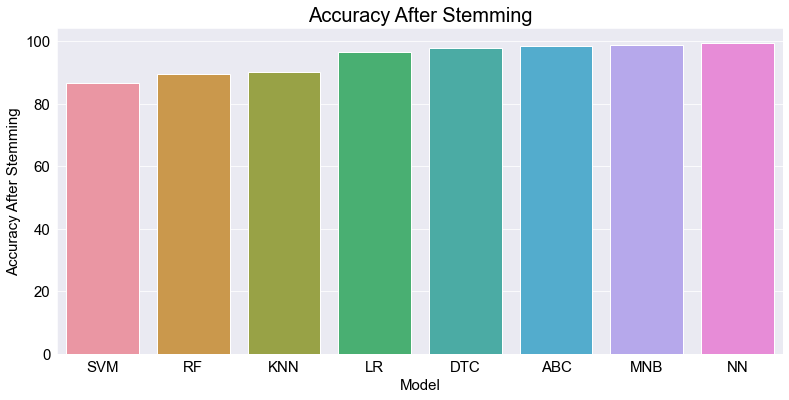

In [41]:
plot_order = dfs.groupby('Model')['Accuracy After Stemming'].sum().sort_values(ascending=True).index.values
plt.figure(figsize =(13,6))
sns.set_style('darkgrid')
sns.barplot(x = "Model", y="Accuracy After Stemming", order=plot_order, data=dfs)
plt.title("Accuracy After Stemming", fontsize = 20, color= "black")
plt.xticks(color= "black", fontsize = 15)
plt.yticks(color= "black", fontsize = 15)
plt.xlabel("Model", color="black", fontsize = 15)
plt.ylabel("Accuracy After Stemming", color="black", fontsize = 15)
plt.show()